In [1]:
import sys
sys.path.insert(1, '/Users/Cas/.julia/dev/MDLearn/prop_calc')

In [2]:
from ase.io import read, write

In [3]:
import utilities
import vacancy
import surface
import pyjulip
import lattice

In [4]:
import matplotlib.pyplot as plt
import importlib
importlib.reload(lattice)

<module 'lattice' from '/Users/Cas/.julia/dev/MDLearn/prop_calc/lattice.py'>

In [22]:
calculator = pyjulip.ACE("Ti_NRLTB_FLD_HMD_surf_vac_ev_ph_3_N4_18_DB30.json")

In [23]:
at_bcc = read("../ev_ph/NRLTB_bcc.xyz")
at_hcp = read("../ev_ph/NRLTB_hcp.xyz")

hcp_EV = lattice.calc_E_vs_V(at_hcp, calculator, dV=0.02, n_steps=(-15,15))
bcc_EV = lattice.calc_E_vs_V(at_bcc, calculator, dV=0.02, n_steps=(-15,15))

guin) Im-3m , Hall  -I 4 2 3
2
Lattice="3.3473483751760638 5.168217544120065e-33 1.3814145204786902e-38 -5.168217544120065e-33 3.3473483751760646 2.6151673013930943e-39 -1.3814145204786902e-38 9.922392150469143e-32 3.3473483751760638" Properties=species:S:1:pos:R:3:forces:R:3 Minim_Constant_Volume=F n_minim_iter=0 energy=-11.935651721487151 stress="0.03929283059167236 -7.400443593031062e-18 4.794802279253363e-18 -7.400443593031062e-18 0.03929283059167226 5.6549224096409634e-18 4.794802279253363e-18 5.6549224096409634e-18 0.03929283059167226" free_energy=-11.935651721487151 config_type=bcc pbc="T T T"
Ti       0.00000000       0.00000000       0.00000000       0.00000000      -0.00000000       0.00000000
Ti       1.67367419       1.67367419       1.67367419      -0.00000000       0.00000000      -0.00000000
trying to relax i 4
relax_config failed to determined base_run_root
relax_config symmetry before refinement at default tol 1.0e-6
ase.spacegroup.symmetrize: prec 1e-06 got symmetry g

In [24]:
Vh = [hcp_EV[i][0] for i in range(len(hcp_EV))] 
Eh = [hcp_EV[i][1] for i in range(len(hcp_EV))] 
Vb = [bcc_EV[i][0] for i in range(len(bcc_EV))] 
Eb = [bcc_EV[i][1] for i in range(len(bcc_EV))] 

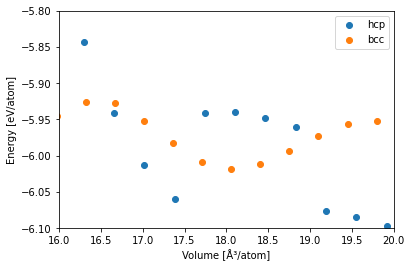

In [25]:
from ase.io import read, write
import matplotlib.pyplot as plt
al = read("../ev_ph/FLD16_hcp_bcc_sm2-6+3p.xyz", ":")
import numpy as np

EVb = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_bcc"]
EVh = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_hcp"]

#plt.scatter(*zip(*EVb))
#plt.scatter(*zip(*EVh))

# plt.scatter(V_Tb, E_Tb)
# plt.scatter(V_Th, E_Th)
#fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
#plt.legend()
plt.scatter(Vh,Eh, label="hcp")
plt.scatter(Vb,Eb, label="bcc")
plt.xlim(16, 20)
plt.ylim(-6.1, -5.8)
plt.ylabel("Energy [eV/atom]")
plt.xlabel("Volume [Å³/atom]")
plt.legend()
plt.savefig("EV.pdf")
#axs[1].hist(V_Tb)
# plt.xlim(16, 20)
# plt.ylim(-6.1, -5.8)

In [26]:
from ase.io import read, write
at = read("../prop_calc/NRLTB_hcp3.xyz")
at.set_calculator(calculator)
properties = vacancy.do_one_vacancy(at, calculator)
print("ERROR [%]", (properties[4]/2.1503731499636274)*100 - 100)
print(properties[4])
#NRLTB 2.1503731499636274

relax_config failed to determined base_run_root
relax_config symmetry before refinement at default tol 1.0e-6
ase.spacegroup.symmetrize: prec 1e-06 got symmetry group number 187 , international (Hermann-Mauguin) P-6m2 , Hall  P -6 2
PreconLBFGS:   0  23:20:45     -314.399639       0.9482
PreconLBFGS:   1  23:20:45     -314.881292       0.4100
PreconLBFGS:   2  23:20:45     -314.942236       0.4343
PreconLBFGS:   3  23:20:46     -315.209896       0.9673
PreconLBFGS:   4  23:20:46     -315.516316       0.7838
PreconLBFGS:   5  23:20:46     -315.768975       0.5323
PreconLBFGS:   6  23:20:46     -315.901454       0.9243
PreconLBFGS:   7  23:20:46     -316.266403       0.3732
PreconLBFGS:   8  23:20:46     -316.402736       0.3108
PreconLBFGS:   9  23:20:47     -316.439567       0.2552
PreconLBFGS:  10  23:20:47     -316.512107       0.2651
PreconLBFGS:  11  23:20:47     -316.531551       0.2287
PreconLBFGS:  12  23:20:47     -316.577142       0.2714
PreconLBFGS:  13  23:20:47     -316.599

In [27]:
surf = read("../prop_calc/NRLTB_hcp_surf.xyz")
bulk = read("../prop_calc/NRLTB_hcp3.xyz")
bulk.set_calculator(calculator)
surf.set_calculator(calculator)
properties = surface.do_symmetric_surface(bulk, surf, calculator)
print("ERROR [%]", (properties["Ef"]/0.13312275617023367)*100 - 100)
print(properties["Ef"])
#NRLTB 0.13350719987790835

got relaxed bulk cell  Cell([[8.870728496683665, -2.8425469926068123e-15, 1.1324443957325822e-38], [-4.43536424834183, 7.682276228202598, 7.663162776850163e-25], [5.474060799563254e-39, -1.4310661229599006e-24, 14.346354863571726]])
got rescaled surf cell  Cell([[8.870728496683665, -2.8425469926068123e-15, 1.1324443957325822e-38], [-4.43536424834183, 7.682276228202598, 7.663162776850163e-25], [5.474060799563254e-39, -1.4310661229599006e-24, 28.692709727143452]])
relax_config failed to determined base_run_root
relax_config symmetry before refinement at default tol 1.0e-6
ase.spacegroup.symmetrize: prec 1e-06 got symmetry group number 164 , international (Hermann-Mauguin) P-3m1 , Hall  -P 3 2"
PreconLBFGS:   0  23:21:17     -306.357622       0.2519
PreconLBFGS:   1  23:21:17     -306.500508       0.2980
PreconLBFGS:   2  23:21:17     -306.574260       0.2691
PreconLBFGS:   3  23:21:17     -307.297779       0.1535
PreconLBFGS:   4  23:21:17     -307.337788       0.1318
PreconLBFGS:   5  2

RuntimeError: Wolff lineSearch failed!

In [28]:
from ase.io import read, write
at = read("../prop_calc/NRLTB_bcc3.xyz")
at.set_calculator(calculator)
properties = vacancy.do_one_vacancy(at, calculator)
print(properties[4])
print("ERROR [%]", (properties[4]/-2.01367884463599)*100 - 100)
print(properties[4])
#0.06872494799677042

relax_config failed to determined base_run_root
relax_config symmetry before refinement at default tol 1.0e-6
ase.spacegroup.symmetrize: prec 1e-06 got symmetry group number 221 , international (Hermann-Mauguin) Pm-3m , Hall  -P 4 2 3
PreconLBFGS:   0  23:21:21     -315.655429       0.7621
PreconLBFGS:   1  23:21:21     -316.467318       0.7853
PreconLBFGS:   2  23:21:21     -316.559224       0.9832
PreconLBFGS:   3  23:21:21     -316.807623       0.9976
PreconLBFGS:   4  23:21:22     -317.170814       0.4900
PreconLBFGS:   5  23:21:22     -317.258417       0.5111
PreconLBFGS:   6  23:21:22     -317.396572       0.3951
PreconLBFGS:   7  23:21:22     -317.559982       0.2772
PreconLBFGS:   8  23:21:22     -317.577614       0.2328
PreconLBFGS:   9  23:21:22     -317.682816       0.2520
PreconLBFGS:  10  23:21:23     -317.809269       0.3400
PreconLBFGS:  11  23:21:23     -317.817556       0.3001
PreconLBFGS:  12  23:21:23     -317.836966       0.1928
PreconLBFGS:  13  23:21:23     -317.8

In [29]:
surf = read("../prop_calc/NRLTB_bcc_surf.xyz")
bulk = read("../prop_calc/NRLTB_bcc3.xyz")
bulk.set_calculator(calculator)
surf.set_calculator(calculator)
properties = surface.do_symmetric_surface(bulk, surf, calculator)
print("ERROR [%]", (properties["Ef"]/0.09008482768759662)*100 - 100)
print(properties["Ef"])
#NRLTB 0.0904881854375216 KLOPT DIT?

got relaxed bulk cell  Cell([[9.787706024992827, 1.5111959773950004e-32, 4.0392805617045097e-38], [-1.5111959773950004e-32, 9.787706024992827, 7.646795577667676e-39], [-3.09513434195661e-38, -3.558886819685004e-38, 9.787706024992827]])
got rescaled surf cell  Cell([[9.787706024992827, 1.5111959773950004e-32, 4.0392805617045097e-38], [-1.5111959773950004e-32, 9.787706024992827, 7.646795577667676e-39], [-3.09513434195661e-38, -3.558886819685004e-38, 19.575412049985655]])
relax_config failed to determined base_run_root
relax_config symmetry before refinement at default tol 1.0e-6
ase.spacegroup.symmetrize: prec 1e-06 got symmetry group number 129 , international (Hermann-Mauguin) P4/nmm , Hall  P 4ab 2ab -1ab
PreconLBFGS:   0  23:21:26     -305.604428       0.6537
PreconLBFGS:   1  23:21:26     -307.525638       0.5745
PreconLBFGS:   2  23:21:26     -307.966298       0.4932
PreconLBFGS:   3  23:21:27     -316.736144       1.3115
PreconLBFGS:   4  23:21:27     -316.928579       1.5577
Prec

0.10737691241333765

In [50]:
from ase.io import read, write
import matplotlib.pyplot as plt
al = read("../ev_ph/FLD_hcp_bcc_big-4+3p_conv.xyz", ":")
import numpy as np

In [128]:
import json
with open('../prop_calc/TiAl-model-NRLTB-test-bulk_Ti_bcc-properties.json') as f:
  datab = json.load(f)

import json
with open('../prop_calc/TiAl-model-NRLTB-test-bulk_Ti_hcp-properties.json') as f:
  datah = json.load(f)

E_Tb = [ datab["E_vs_V"][i][1] for i in range(len(datab["E_vs_V"])) ]
V_Tb = [ datab["E_vs_V"][i][0] for i in range(len(datab["E_vs_V"])) ]

E_Th = [ datah["E_vs_V"][i][1] for i in range(len(datah["E_vs_V"])) ]
V_Th = [ datah["E_vs_V"][i][0] for i in range(len(datah["E_vs_V"])) ]

In [52]:
from ase.io import read, write
import matplotlib.pyplot as plt
al = read("../ev_ph/FLD_hcp_bcc_big-4+3p_conv.xyz", ":")
import numpy as np

EVb = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_bcc"]
EVh = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_hcp"]

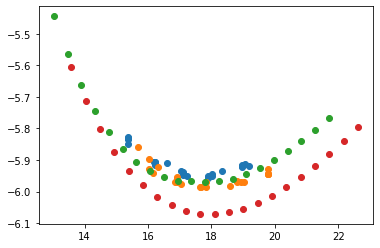

In [53]:
EVb = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_bcc"]
EVh = [ (at.get_volume()/len(at), at.info["energy"]/len(at)) for at in al if at.info["config_type"] == "FLD_hcp"]

plt.scatter(*zip(*EVb))
plt.scatter(*zip(*EVh))

plt.scatter(V_Tb, E_Tb)
plt.scatter(V_Th, E_Th)

In [143]:
at = read("../ev_ph/NRLTB_hcp.xyz")

In [123]:
del at.arrays["forces"]


KeyError: 'forces'

In [127]:
del at.info["config_type"]
del at.info["energy"]
del at.info["n_minim_iter"]
del at.info["free_energy"]
del at.info["stress"]

In [128]:
write("../ev_ph/NRLTB_bcc_c.xyz", at)

In [144]:
at2 = ase.Atoms("2Ti", positions = at.get_positions(), cell=at.get_cell(), pbc=[True,True,True])

In [145]:
write("../ev_ph/NRLTB_hcp_c.xyz", at2)